## 1. Introduction: 

Despite its regional popularity, the National Hockey League (NHL) is widely considered the least popular of the 4 major sports leagues in the United States. In recent years, league officials have made several efforts to increase viewership and popularity, particularly among potential fans in non-traditional hockey markets. One such effort came in the form of a controversial 2018/2019 rule change which reduced the size of the padding goaltenders are allowed to wear. 

More information on the context and specifics of the rule chages can be found here: https://www.nhl.com/news/nhl-nhlpa-add-chest-arm-pad-rules-for-goalies/c-300172856

The ideas behind the rule change are simple - league officials believe goalies are less likely to make saves with smaller pads and higher scoring games are a better product, especially for more casual fans in non-traditional markets. 


## 2. Hypothesis:

H₀: There is no significant change in the average save percentage in the 3 seasons played since the rule change

Hₐ: There has been a significant change in the average save percentage in the 3 seasons played since the rule change


## 3. Data:

Using the NHL statistics database (http://www.nhl.com/stats/goalies), I have exported goaltender data for the past 6 seasons. The data contains 406 observations and 21 variables. I will compare the three seasons prior to the rule change to the three seasons since. To control for outliers, I have filtered the data for players that appeared in at least 10 games. This is also consistent with the structure of entry level contracts which require players under the age of 19 to play in at least 10 games before their contracts are enacted. 



In [1]:
#setting up the environment 

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import glob


#The data is contained in 9 seperate xlsx files. I will use the method below to combine them into one DataFrame.
#I have filtered the data for players that participated in at least 10 games prior to export

path = 'https://github.com/JREnglish99/thinkful-data-science/tree/main/nhl_data'
all_files = glob.glob(path + "/*.xlsx")

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

goalies = pd.concat(li, axis=0, ignore_index=True)

In [2]:
goalies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  406 non-null    object 
 1   Season  406 non-null    int64  
 2   Team    406 non-null    object 
 3   S/C     406 non-null    object 
 4   GP      406 non-null    int64  
 5   GS      406 non-null    int64  
 6   W       406 non-null    int64  
 7   L       406 non-null    int64  
 8   T       406 non-null    object 
 9   OT      406 non-null    int64  
 10  SA      406 non-null    object 
 11  Svs     406 non-null    object 
 12  GA      406 non-null    int64  
 13  Sv%     406 non-null    float64
 14  GAA     406 non-null    float64
 15  TOI     406 non-null    object 
 16  SO      406 non-null    int64  
 17  G       406 non-null    int64  
 18  A       406 non-null    int64  
 19  P       406 non-null    int64  
 20  PIM     406 non-null    int64  
dtypes: float64(2), int64(12), object(7)
mem

In [3]:
goalies.head()

,Player,Season,Team,S/C,GP,GS,W,L,T,OT,...,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
0,Jeremy Swayman,20202021,BOS,L,10,10,7,3,--,0,...,256,15,0.945,1.50,601:43,2,0,0,0,0
1,Chris Driedger,20192020,FLA,L,12,11,7,2,--,1,...,332,22,0.938,2.05,642:40,1,0,0,0,0
2,Carey Price,20152016,MTL,L,12,12,10,2,--,0,...,341,24,0.934,2.06,698:20,2,0,0,0,0
3,Ben Bishop,20182019,DAL,L,46,45,27,15,--,2,...,"1,236",87,0.934,1.98,2637:18,7,0,2,2,2
4,Curtis McElhinney,20172018,TOR,L,18,15,11,5,--,1,...,493,35,0.934,2.14,979:07,3,0,1,1,0


## 4. Methods:

For this analysis I will create two seperate DataFrames. The first DataFrame will contain records of player statistics for the three seasons prior to the rule change (2015/2016, 2016/2017, 2017/2018). The second DataFrame will contain records of player statistics for the three seasons since the rule change (2018/2019, 2019/2020, 2020/2021). 

I will evaluate whether or not the distribution of save percentage (Sv%) appears to be normal using their histogram, skewness and kurtosis. I will also use the Shaprio-Wilks test as the sample size is under 2000. 

If the distributions appear normal, I will conduct an independent samples t-test comparing the two groups at a 95% confidence interval.



In [18]:
#splitting the dataset by date

pre_rule_change = goalies[(goalies['Season'].isin([20152016, 20162017, 20172018]))] 
post_rule_change = goalies[(goalies['Season'].isin([20182019, 20192020, 20202021]))] 

print(pre_rule_change.info())
print(post_rule_change.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 2 to 405
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  203 non-null    object 
 1   Season  203 non-null    int64  
 2   Team    203 non-null    object 
 3   S/C     203 non-null    object 
 4   GP      203 non-null    int64  
 5   GS      203 non-null    int64  
 6   W       203 non-null    int64  
 7   L       203 non-null    int64  
 8   T       203 non-null    object 
 9   OT      203 non-null    int64  
 10  SA      203 non-null    object 
 11  Svs     203 non-null    object 
 12  GA      203 non-null    int64  
 13  Sv%     203 non-null    float64
 14  GAA     203 non-null    float64
 15  TOI     203 non-null    object 
 16  SO      203 non-null    int64  
 17  G       203 non-null    int64  
 18  A       203 non-null    int64  
 19  P       203 non-null    int64  
 20  PIM     203 non-null    int64  
dtypes: float64(2), int64(12), object(7)
mem

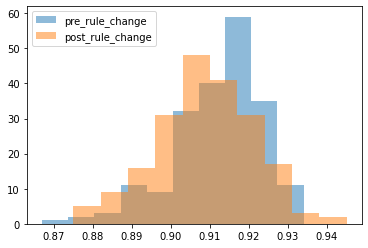

DescribeResult(nobs=203, minmax=(0.867, 0.934), mean=0.9120738916256158, variance=0.00013051431497829608, skewness=-0.8256438452587909, kurtosis=0.9396057481526761)
DescribeResult(nobs=203, minmax=(0.875, 0.945), mean=0.9083152709359608, variance=0.0001593852606935573, skewness=-0.2044861672622778, kurtosis=0.1142300525549822)


In [19]:
#ploting the histogram

plt.hist(pre_rule_change['Sv%'], alpha = .5, label='pre_rule_change')
plt.hist(post_rule_change['Sv%'], alpha = .5, label='post_rule_change')
plt.legend(loc='upper left')

plt.show()

#descriptive statistics

print(stats.describe(pre_rule_change['Sv%']))
print(stats.describe(post_rule_change['Sv%']))

In [20]:
# Shapiro-Wilk Test

print(stats.shapiro(pre_rule_change['Sv%']))
print(stats.shapiro(post_rule_change['Sv%']))

ShapiroResult(statistic=0.9600621461868286, pvalue=1.740946390782483e-05)
ShapiroResult(statistic=0.992858350276947, pvalue=0.4302244782447815)


In [22]:
#shapiro p-value for post_rule_change Sv% is lower than .5. However, this test is sensitive for samples over 50
#visual inspection and descriptive stats look good to proceed to t-test

stats.ttest_ind(pre_rule_change['Sv%'], post_rule_change['Sv%'])

Ttest_indResult(statistic=3.145232315578933, pvalue=0.0017822882556259103)

In [29]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(pre_rule_change['Sv%'], post_rule_change['Sv%']))

#the average save% for both years

print("The avereage save percentage pre rule change is: {}" .format(pre_rule_change['Sv%'].mean()))

print("The avereage save percentage post rule change is: {}" .format(post_rule_change['Sv%'].mean()))



The difference in means at the 95% confidence interval (two-tail) is between -0.006100863110106882 and -0.0014163782692038756.
The avereage save percentage pre rule change is: 0.9120738916256157
The avereage save percentage post rule change is: 0.9083152709359603


[[Text(0, 0, 'pre_rule_change'), Text(1, 0, 'post_rule_change')]]

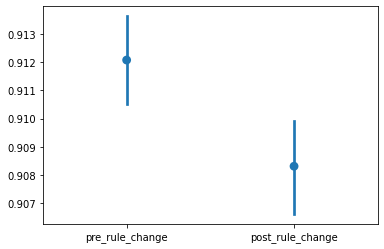

In [30]:
# adding a piont plot to help vizualize the difference in means
#note that this vizualizes the confidence interval of each mean as opposed ...
#...to the t-test confidence interval of the difference in means

import seaborn as sns

avg_save_percentage_difference = sns.pointplot(data=[pre_rule_change['Sv%'],
                        post_rule_change['Sv%']], join=False)
                        
avg_save_percentage_difference.set(xticklabels = ['pre_rule_change', 'post_rule_change'])

## 5. Results:

Using a combination of visual inspection, descriptive stats and the Shapiro-Wilk test, I confirmed that the save percentages are normally distributed. Based on the test statistic of 3.14 and the p-value of .001, I can reject the null hypothesis that there is no significant change in the average save percentage in the 3 seasons played since the rule change.

The confidence interval od 95% indicates that the difference in means is between -0.006 and -0.001. The avereage save percentage pre-rule change is 0.912 and the avereage save percentage post rule change is: 0.908.


## 6. Discussion and Recommendation:

The average save percentage for NHL goalies has decreased significantly in the three seasons since rules were put in place to limit the size of their padding, when compared to the three seasons prior to the rule change. 

While this seems to indicate that reducing equipement size caused more goals, there could be other significant variables at play contributing to the decrease in save percentage. It would be interesting to compare the save percentage statistics to scoring statistics for non-goalies to see if that yeilds any other insights. One difficult to define variable outside of this dataset would be the impact of the playing conditions during COVID. This could potentially bias the post rule numbers. More data should be collected and the effectiveness of the rule change in generating more scoring should continue to be evaluated.

In regards to the NHL's larger goal of generating more interest in the game (and ultimately more money for the league), this analysis should be viewed as one piece of a larger analysis of market share that would likely include things like fan surveys, viewership ratings...etc. 

